In [67]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

dataDir='.'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [16]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.68s)
creating index...
index created!


In [17]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.18s)
creating index...
index created!


In [20]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
furniture electronic animal food indoor vehicle outdoor person accessory sports appliance kitchen


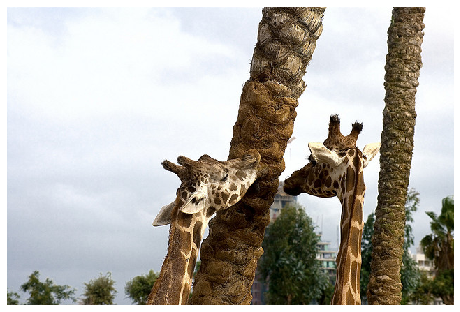

In [119]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['giraffe']);
imgIds = coco.getImgIds(catIds=catIds);
#imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]


# load and display image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

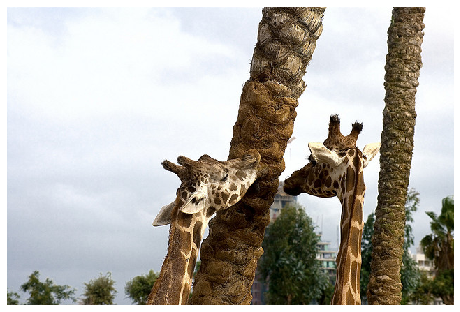

[['Two', 'tall', 'giraffes', 'are', 'next', 'to', 'bare', 'trees', '.'], ['a', 'close', 'up', 'of', 'two', 'giraffes', 'near', 'one', 'another'], ['A', 'couple', 'of', 'giraffe', 'standing', 'around', 'palm', 'trees', '.'], ['Two', 'giraffes', 'are', 'standing', 'next', 'to', 'a', 'tree', 'trunk', '.'], ['Two', 'giraffes', 'are', 'standing', 'by', 'a', 'palm', 'tree', '.']]


In [120]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
captions = [anns[i]['caption'] for i in range(len(anns))] #list of all captions for this image
plt.imshow(I); plt.axis('off'); plt.show()
#print(captions)
tokenized = [word_tokenize(capt) for capt in captions]
print(tokenized)



In [121]:
#CALCULATES SCORE FOR ONE REFERENCE, ONE CANDIDATE FOR ALL CANDIDATES
reference = [tokenized[0]]

##different weight parameters##
unigram = (1,0,0,0)
bigram = (0,1,0,0)
bleu4 = (.25, .25, .25, .25)

for i in range(1, len(tokenized)):
    candidate = tokenized[i]
    score = sentence_bleu(reference, candidate, weights=unigram)
    print(f"BLEU unigram score for sentence {i} is {score}.")


BLEU unigram score for sentence 1 is 0.11111111111111109.
BLEU unigram score for sentence 2 is 0.2222222222222222.
BLEU unigram score for sentence 3 is 0.6.
BLEU unigram score for sentence 4 is 0.4444444444444444.


In [116]:
s = 'A giraffe is eating at a zoo.'
s1 = word_tokenize(s)

In [118]:
#Score for all references, one generated sentence
reference = tokenized
unigram = (1,0,0,0)
bigram = (0,1,0,0)
bleu4 = (.25, .25, .25, .25)
candidate = s1 #generated sentence
score = sentence_bleu(reference, candidate, weights=unigram)
print(score)


0.6618726769384466
